In [45]:
import pandas as pd
pd.set_option('display.max_rows', 10000)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from numpy import cov



In [46]:
df=pd.read_csv('../data/Pakwheels_Cleaned.csv')

In [47]:
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [48]:
CC=[]
for i in range(len(df)):
    CC.append(int(df['CC'][i]))
df['CC']=CC

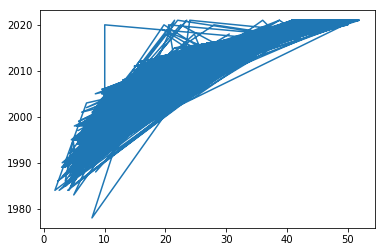

In [49]:
plt.plot(df['prices'],df['year'])
plt.show()

In [50]:
df.dtypes

titles           object
city             object
Engine           object
CC                int64
Transmission     object
mileage           int64
year              int64
prices          float64
dtype: object

In [51]:
df.head()

,titles,city,Engine,CC,Transmission,mileage,year,prices
0,Honda Civic Rebirth 2015 VTi Oriel Prosmatec 1...,Islamabad,Petrol,1800,Automatic,44000,2015,32.50
1,Honda Civic 2020 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,Petrol,1800,Automatic,24000,2020,42.50
2,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,Petrol,1800,Automatic,7000,2018,39.75
3,Honda Civic 2012 VTi Oriel Prosmatec 1.8 i-VT...,Karachi,Petrol,1800,Automatic,85000,2012,19.75
4,Honda Civic 2017 Oriel 1.8 i-VTEC CVT for Sale,Karachi,Petrol,1800,Automatic,6300,2017,37.00


In [52]:
df['Transmission'].unique()
df['Transmission']=df["Transmission"].astype('category')
df['Transmission']=df["Transmission"].cat.codes
#Automatic=0
#Manual=1

In [53]:
df['Engine'].unique()

array(['Petrol', 'CNG', 'Hybrid', 'Electric', 'Diesel', 'LPG'],
      dtype=object)

In [54]:
df['Engine']=df["Engine"].astype('category')
df['Engine']=df["Engine"].cat.codes
#Petrol=5
#CNG=0
#Hybrid=3
#Electric=2
#Diesel=1
#LPG=4

In [55]:
pf=df

In [56]:
city=pf['city'].factorize()[0]
mapedCity=pf['city'].factorize()[1]

In [57]:
df['mapCity']=city

In [58]:
df.head()

,titles,city,Engine,CC,Transmission,mileage,year,prices,mapCity
0,Honda Civic Rebirth 2015 VTi Oriel Prosmatec 1...,Islamabad,5,1800,0,44000,2015,32.50,0
1,Honda Civic 2020 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,5,1800,0,24000,2020,42.50,0
2,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,5,1800,0,7000,2018,39.75,0
3,Honda Civic 2012 VTi Oriel Prosmatec 1.8 i-VT...,Karachi,5,1800,0,85000,2012,19.75,1
4,Honda Civic 2017 Oriel 1.8 i-VTEC CVT for Sale,Karachi,5,1800,0,6300,2017,37.00,1


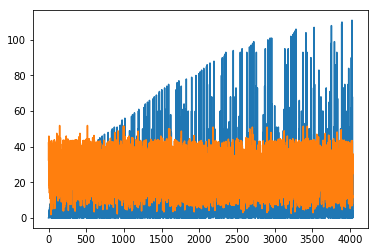

In [59]:
df[['mapCity','prices']]
plt.plot(df[['mapCity','prices']])

In [60]:
plt.show()

In [61]:
df.dtypes
df.head()

,titles,city,Engine,CC,Transmission,mileage,year,prices,mapCity
0,Honda Civic Rebirth 2015 VTi Oriel Prosmatec 1...,Islamabad,5,1800,0,44000,2015,32.50,0
1,Honda Civic 2020 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,5,1800,0,24000,2020,42.50,0
2,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,Islamabad,5,1800,0,7000,2018,39.75,0
3,Honda Civic 2012 VTi Oriel Prosmatec 1.8 i-VT...,Karachi,5,1800,0,85000,2012,19.75,1
4,Honda Civic 2017 Oriel 1.8 i-VTEC CVT for Sale,Karachi,5,1800,0,6300,2017,37.00,1


In [62]:
covariance=cov(df['prices'],df['mileage'])

In [63]:
from scipy.stats import pearsonr

In [64]:
corr, _ = pearsonr(df['prices'].values, df['Transmission'].values)
print('Pearsons correlation: %.3f' % corr)
#correlation with engine = 0.096
#correlation with City = -0.085
#correlation with year = 0.937
#correlation with CC = 0.541
#correlation with Transmission = -0.558

Pearsons correlation: -0.558


In [65]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df['prices'].values, df['Engine'].values)
print('Spearmans correlation: %.3f' % corr)
#Spearman correlation with engine = 0.089
#Spearman correlation with City = -0.060
#Spearman correlation with year = 0.981
#Spearman correlation with CC = 0.640
#Spearman correlation with Transmission = -0.571

Spearmans correlation: 0.089


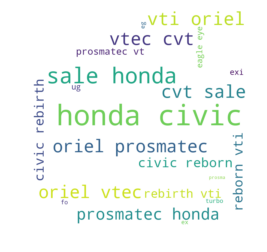

In [68]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = df
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = "".join(cat.split()[1] for cat in df.titles)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white',height=20,width=20,max_words=2000).generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
pf=df[['Engine','CC','Transmission','mileage','year','prices','mapCity']]
pf.to_csv('../data/PakwheelsEDA.csv')